# Perkeso Data Exploration

### Imports

In [26]:
# Imports
random_seed = 42
import os
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from scipy import stats
from datetime import datetime

import augment
import preprocess

## check how many times each subject repeated each gesture

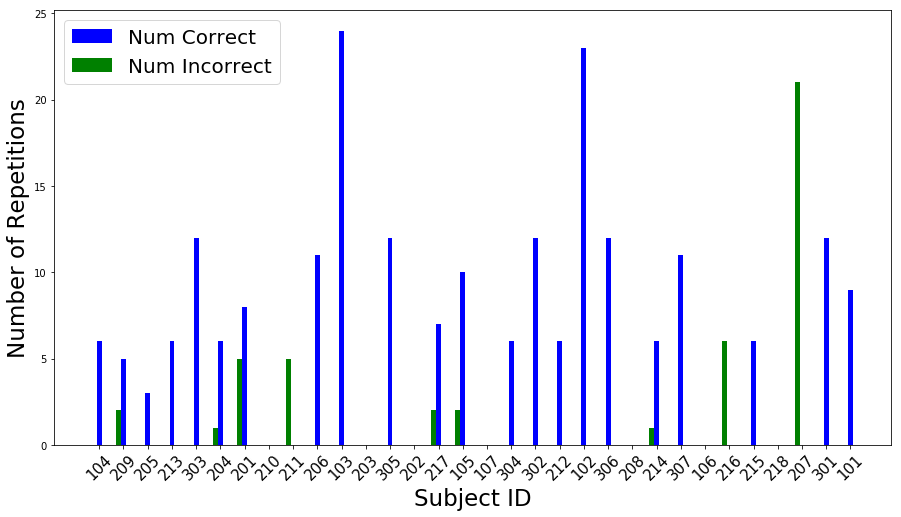

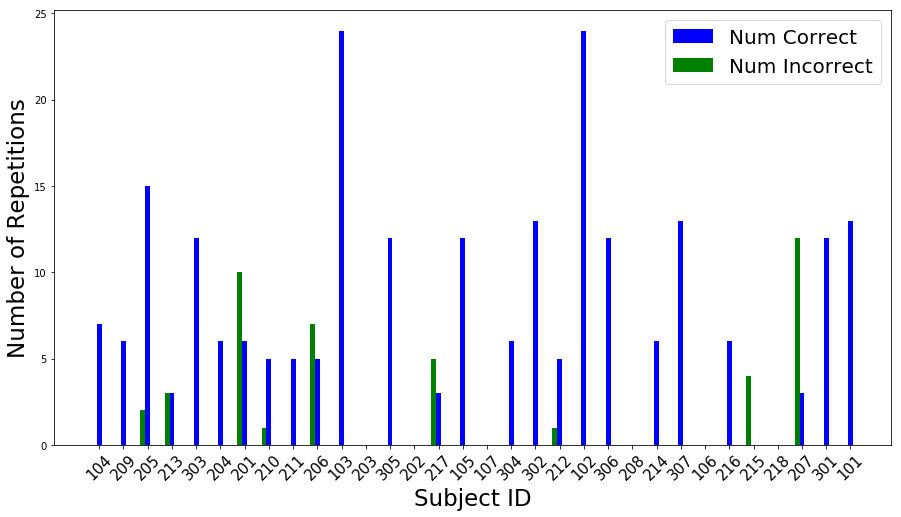

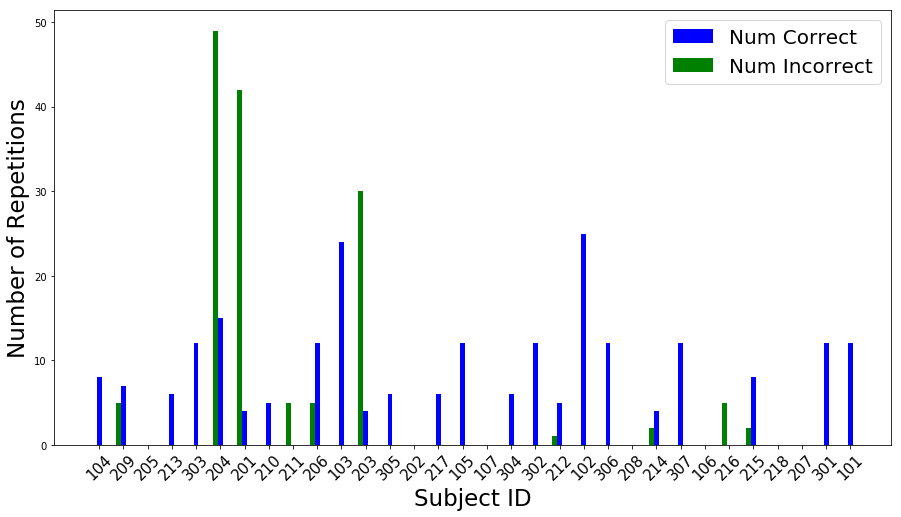

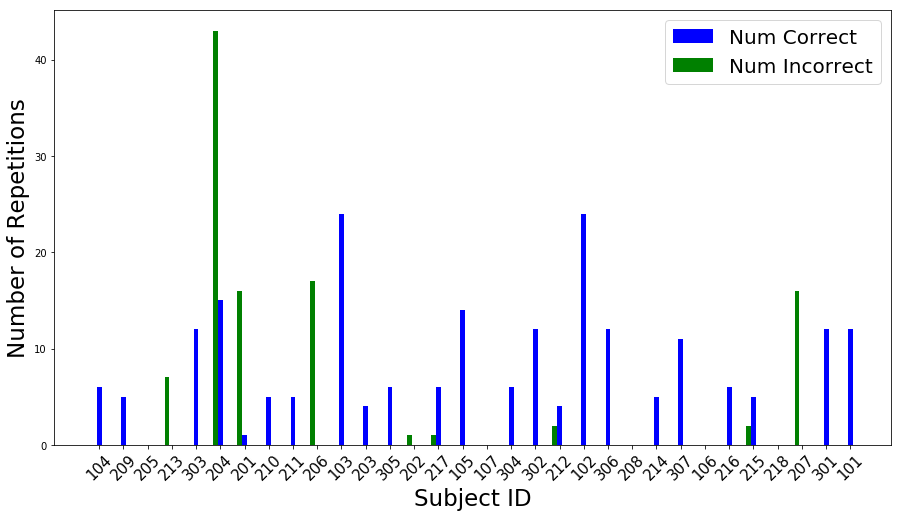

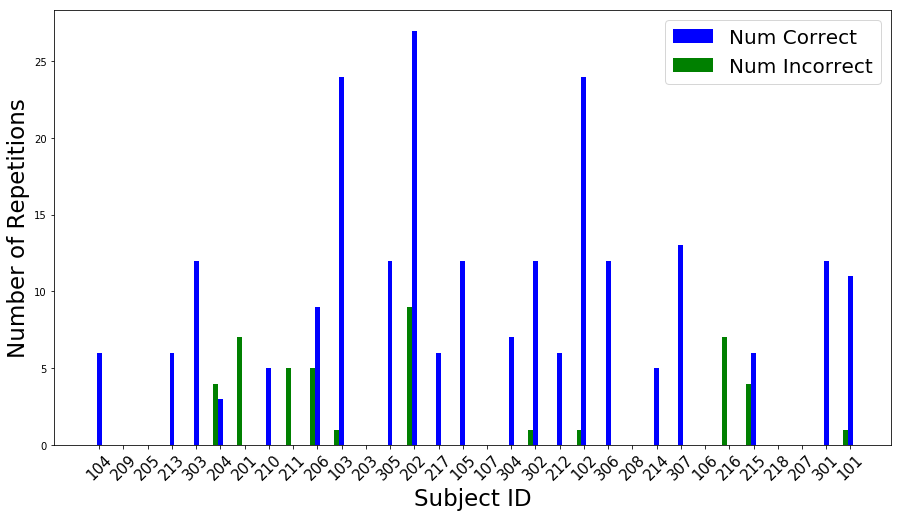

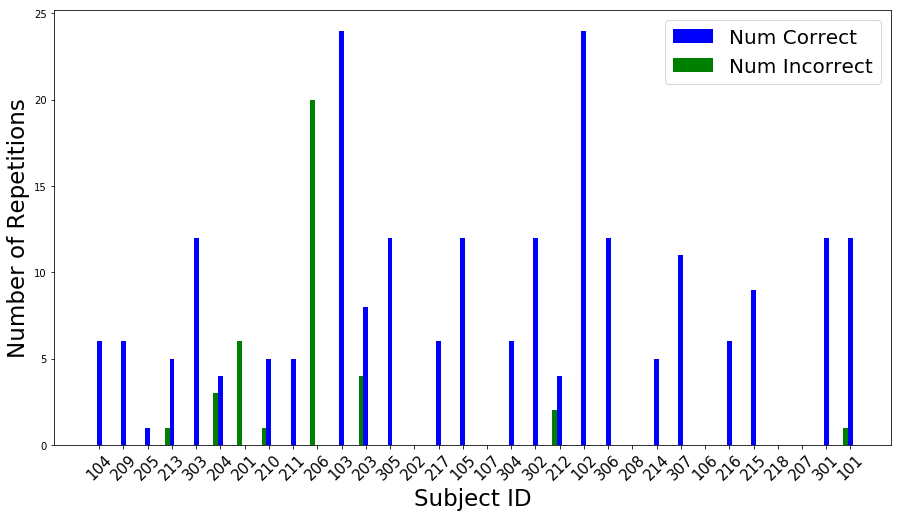

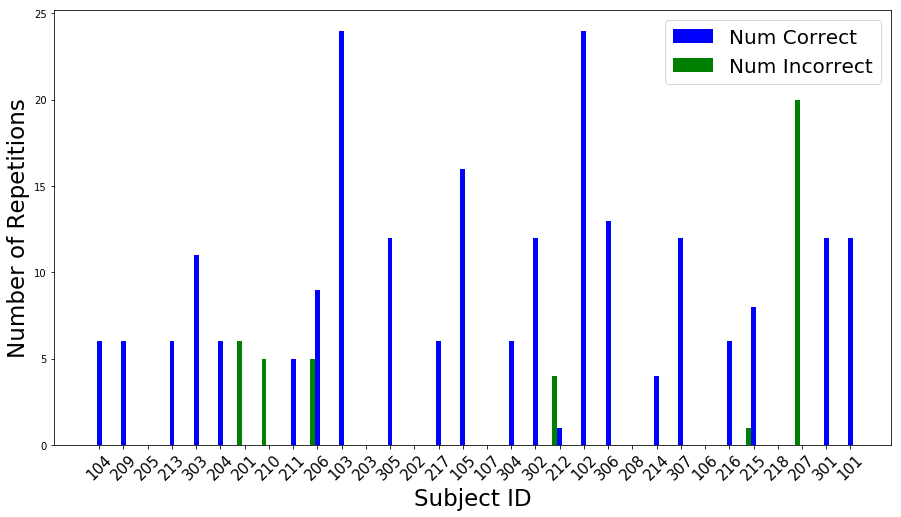

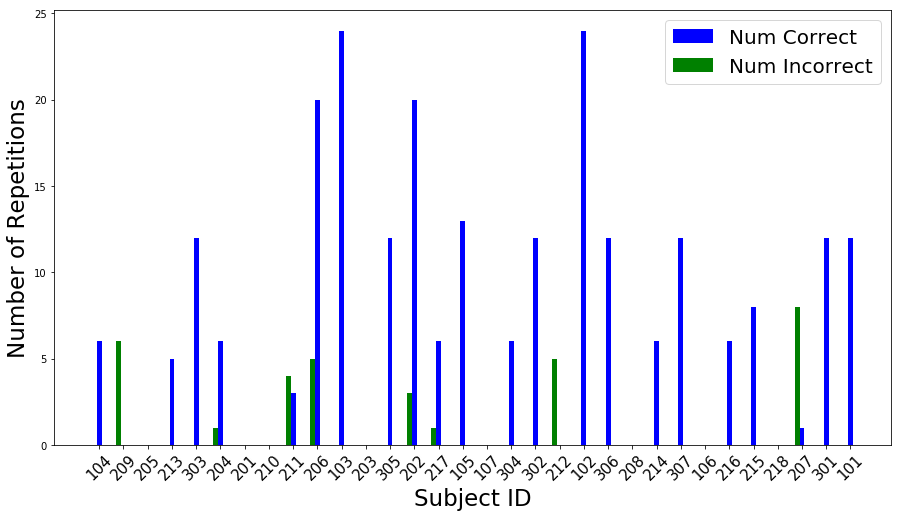

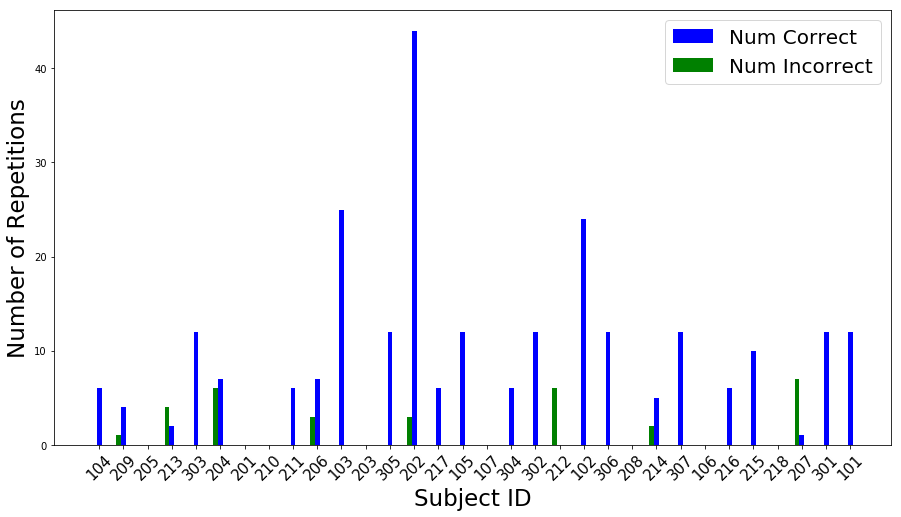

In [23]:
subj_correct_stats = {}
subj_incorrect_stats = {}
# patientid_date_label_repetitionNumber_correction_position.txt
moves = ['0','1','2','3','4','5','6','7','8']
labels = ['1','2']
subjects = ['104', '209', '205', '213', '303', '204', '201', '210', '211', '206', '103', '203', '305', '202', '217', '105',
 '107',  '304', '302', '212', '102', '306', '208', '214', '307', '106', '216', '215', '218', '207', '301', '101']
m = []
for mov in moves:
    #print('Move: ',mov)
    for subj in subjects:
        #print('Subj: ',subj)
        for label in labels:
            count = 0
            #print('Label: ',label)
            file_list = glob.glob('/home/noureddin/Perkeso-Simplified/'+subj+'_*_'+mov+'_*_'+label+'_*.txt')               
            #print('Count: ',len(file_list))
            if label == '1':
                subj_correct_stats[subj] = len(file_list)
            else:
                subj_incorrect_stats[subj] = len(file_list)  
    
    # Now plot
    X = np.arange(len(subj_correct_stats))

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1,1,1)


    ax.bar(X, subj_correct_stats.values(), width=0.2, color='b', align='center')
    ax.bar(X-0.2, subj_incorrect_stats.values(), width=0.2, color='g', align='center')
    ax.legend(('Num Correct','Num Incorrect'), fontsize=20)

    plt.xticks(X, subj_correct_stats.keys(), fontsize=15)
    plt.xlabel('Subject ID', fontsize=23)
    ax.tick_params(axis='x', rotation=45)
    plt.ylabel('Number of Repetitions', fontsize=23)
    #plt.title("Episode Counts for Move: "+mov, fontsize=17)
    plt.show()
    #print(m)      

{'104': 0,
 '209': 2,
 '205': 0,
 '213': 0,
 '303': 0,
 '204': 1,
 '201': 5,
 '210': 0,
 '211': 5,
 '206': 0,
 '103': 0,
 '203': 0,
 '305': 0,
 '202': 0,
 '217': 2,
 '105': 2,
 '107': 0,
 '304': 0,
 '302': 0,
 '212': 0,
 '102': 0,
 '306': 0,
 '208': 0,
 '214': 1,
 '307': 0,
 '106': 0,
 '216': 6,
 '215': 0,
 '218': 0,
 '207': 21,
 '301': 0,
 '101': 0}

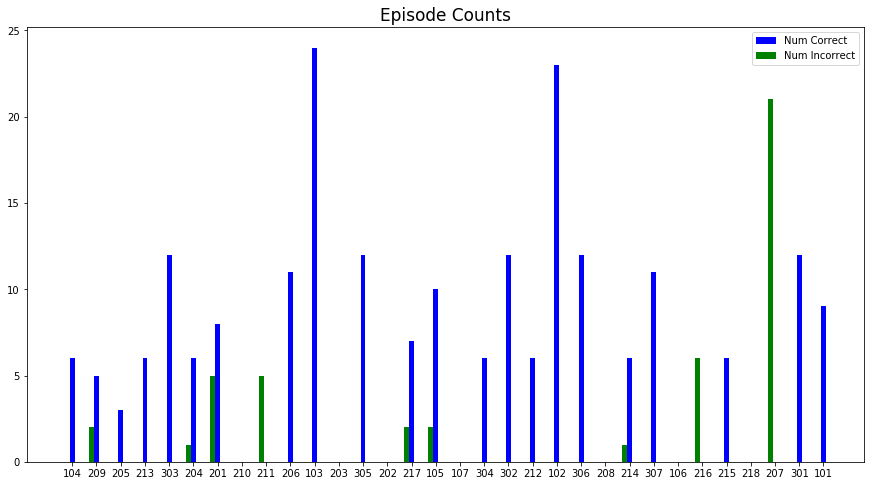

## Check the number of correct and incorrect episodes for each gesture

In [11]:
correct_stats = {}
incorrect_stats = {}

In [12]:
# patientid_date_label_repetitionNumber_correction_position.txt
moves = ['0','1','2','3','4','5','6','7','8']
labels = ['1','2']
subjects = ['104', '209', '205', '213', '303', '204', '201', '210', '211', '206', '103', '203', '305', '202', '217', '105',
 '107',  '304', '302', '212', '102', '306', '208', '214', '307', '106', '216', '215', '218', '207', '301', '101']
m = []
for mov in moves:
    #print('Move: ',mov)
    for label in labels:
        count = 0
        #print('Label: ',label)
        for subj in subjects:
            #print('Subj: ',subj)
            for file_name in glob.glob('/home/noureddin/Perkeso-Simplified/'+subj+'_*_'+mov+'_*_'+label+'_*.txt'):
                tmp_df = pd.read_csv(file_name,header=None)
                m.append(tmp_df.shape[0])
                count += 1
        #print('Count: ',count)
        if label == '1':
            correct_stats[mov] = count
        else:
            incorrect_stats[mov] = count
#print(m)            

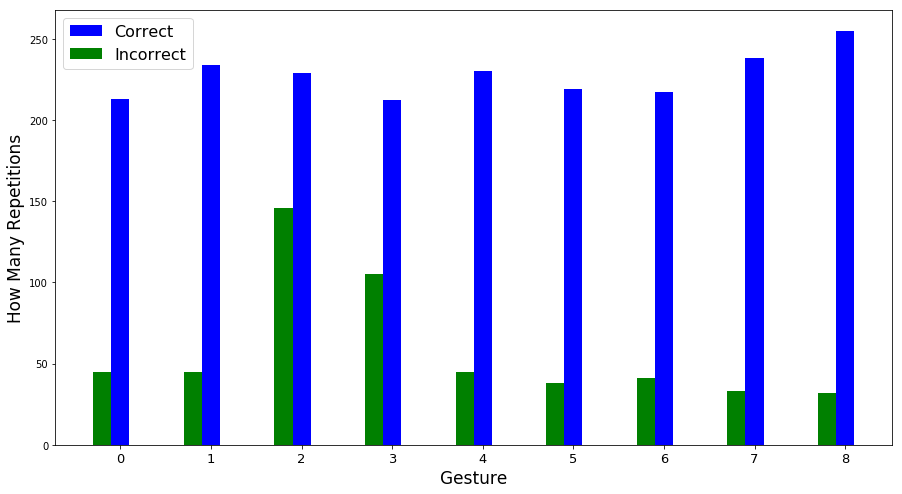

In [16]:
#sample data

X = np.arange(len(correct_stats))


# original data is at top left
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)


ax.bar(X, correct_stats.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, incorrect_stats.values(), width=0.2, color='g', align='center')
ax.legend(('Correct','Incorrect'),fontsize=16)

plt.xticks(X, correct_stats.keys(),fontsize=13)
plt.xlabel('Gesture', fontsize=17)
#ax.tick_params(axis='x', rotation=45)
plt.ylabel('How Many Repetitions', fontsize=17)
    
#plt.title("Move Counts", fontsize=17)
plt.show()

In [29]:
#print(correct_stats, incorrect_stats)
def aug_times(mov):
    a = {'0': 4, '1': 5,'2': 1, '3': 2, '4': 5, '5': 5, '6': 5, '7': 7, '8': 7}
    return a[mov]

## Load data
patientid_date_label_repetitionNumber_correction_position.txt

In [38]:
def load_move_data(mov):
    # patientid_date_label_repetitionNumber_correction_position.txt
    #moves = ['0']#,'1','2','3','4','5','6','7','8']
    labels = ['1','2']
    subjects = ['104', '209', '205', '213', '303', '204', '201', '210', '211', '206', '103', '203', '305', '202', '217', '105',
     '107',  '304', '302', '212', '102', '306', '208', '214', '307', '106', '216', '215', '218', '207', '301', '101']
    #dates = ['19', '14', '12', '13', '07', '18']
    #position = ['sit', 'stand','chair','wheelchair','Stand-frame']
    data = pd.DataFrame()
    #for mov in moves:
    #print('Move: ',mov)
    for label in labels:
        #count = 0
        #print('Label: ',label)
        for subj in subjects:
            #print('Subj: ',subj)
            for file_name in glob.glob('/home/noureddin/Perkeso-Simplified/'+subj+'_*_'+mov+'_*_'+label+'_*.txt'):
                #count += 1
                tmp_df = pd.read_csv(file_name,header=None)
                if len(tmp_df) >= 28:
                    tmp_ = pd.DataFrame()#for augmentation
                    if label == '2':
                        #now augment data                        
                        augment_times = aug_times(mov)
                        for i in range(0,augment_times):                
                            tdata = tmp_df.values
                            #dd = DA_TimeWarp(DA_Permutation(DA_Rotation(data)))
                            dd = augment.DA_TimeWarp3(augment.DA_Rotation((tdata)))
                            #make sure the # of rows is 28
                            dd = preprocess.normalize_move(pd.DataFrame(dd), 28, mean=False)
                            #transform values into specific range
                            dd = preprocess.normalize_df(dd) # e.g. all cols in range [0,1]
                            #mean centre the df
                            dd = preprocess.mean_centre_data(dd)                
                            tmp_ = tmp_.append(dd,ignore_index=True)
                
                    #make sure the # of rows is 28
                    tmp_df = preprocess.normalize_move(tmp_df, 28, mean=False)
                    #transform values into specific range
                    tmp_df = preprocess.normalize_df(tmp_df) # e.g. all cols in range [0,1] 
                    #mean centre the df
                    tmp_df = preprocess.mean_centre_data(tmp_df)
                    tmp_df['Original'] = 1 
                    if len(tmp_) > 0:
                        tmp_['Original']   = 0
                        tmp_df = tmp_df.append(tmp_,ignore_index=True)
                
                    tmp_df.columns = ['f_'+str(i) for i in range(tmp_df.shape[1])]
                    tmp_df.rename(columns={'f_75':'Original'}, inplace=True)
                    
                    tmp_df['Subject'] = subj
                    tmp_df['Class'] = 1 if label == '1' else 0
                    data = data.append(tmp_df,ignore_index=True)
                    #print(data.shape)   
    return data

In [39]:
data = load_move_data('6')

In [46]:
x = data.drop('Original', axis=1)

In [40]:
#print(data[data['Class'] == 1].shape)
#print(data[data['Class'] == 0].shape)
#data.tail()

In [60]:
h = x.head(4)

In [61]:
md = x.tail(4)

In [62]:
#x.head(100)

In [63]:
b = x[x['Subject'] == '307'].head(4)

In [64]:
md

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,Subject,Class
12960,0.389547,-0.346379,-0.413001,-0.088098,-0.443409,0.163401,-0.203522,-0.398326,0.375509,-0.403863,...,-0.428489,0.110594,-0.143572,-0.404433,0.092959,-0.111962,-0.403617,0.092209,207,0
12961,0.345924,-0.292109,-0.459021,-0.093428,-0.397621,0.140697,-0.182243,-0.357074,0.373024,-0.369103,...,-0.330326,0.022125,-0.178073,-0.329374,0.097060,-0.163124,-0.361476,0.099523,207,0
12962,0.345251,-0.179847,-0.475891,-0.085779,-0.340273,0.174718,-0.168349,-0.319079,0.424000,-0.372555,...,-0.301870,0.232226,-0.133484,-0.304038,0.147896,-0.131207,-0.333599,0.133827,207,0
12963,0.282997,-0.186110,-0.361115,-0.163027,-0.419644,0.274022,-0.235859,-0.411450,0.462465,-0.450675,...,-0.521136,0.307125,-0.194082,-0.553467,0.304564,-0.163071,-0.433682,0.314631,207,0


In [65]:
pd.concat([h,md,b])

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,Subject,Class
0,0.166231,-0.359542,0.459256,0.071129,-0.390503,0.090465,0.032458,-0.281523,-0.402619,0.443939,...,-0.681504,0.347874,0.204270,-0.691752,0.443918,0.309931,-0.680854,0.550113,104,1
1,0.251166,-0.355813,0.442954,0.107769,-0.390618,0.085917,0.044794,-0.285832,-0.396323,0.443446,...,-0.637890,0.183466,0.250281,-0.669973,0.295313,0.223179,-0.618648,0.346856,104,1
2,0.384341,-0.342186,0.406632,0.141037,-0.387516,0.085441,0.046662,-0.293116,-0.360690,0.429471,...,-0.585461,0.065661,0.293015,-0.617426,0.105410,0.384913,-0.597577,0.147588,104,1
3,0.490146,-0.311708,0.353401,0.187423,-0.371982,0.089818,0.055606,-0.283815,-0.265881,0.375858,...,-0.520454,-0.125984,0.391445,-0.542725,-0.099277,0.468084,-0.535048,-0.107662,104,1
12960,0.389547,-0.346379,-0.413001,-0.088098,-0.443409,0.163401,-0.203522,-0.398326,0.375509,-0.403863,...,-0.428489,0.110594,-0.143572,-0.404433,0.092959,-0.111962,-0.403617,0.092209,207,0
12961,0.345924,-0.292109,-0.459021,-0.093428,-0.397621,0.140697,-0.182243,-0.357074,0.373024,-0.369103,...,-0.330326,0.022125,-0.178073,-0.329374,0.097060,-0.163124,-0.361476,0.099523,207,0
12962,0.345251,-0.179847,-0.475891,-0.085779,-0.340273,0.174718,-0.168349,-0.319079,0.424000,-0.372555,...,-0.301870,0.232226,-0.133484,-0.304038,0.147896,-0.131207,-0.333599,0.133827,207,0
12963,0.282997,-0.186110,-0.361115,-0.163027,-0.419644,0.274022,-0.235859,-0.411450,0.462465,-0.450675,...,-0.521136,0.307125,-0.194082,-0.553467,0.304564,-0.163071,-0.433682,0.314631,207,0
4676,0.223771,-0.325710,-0.285531,-0.178752,-0.297817,-0.508891,-0.211227,-0.139442,-0.577750,-0.117956,...,-0.663165,0.278687,0.071155,-0.585036,-0.140067,0.094612,-0.660406,-0.154199,307,1
4677,0.239148,-0.324122,-0.218821,-0.193231,-0.299072,-0.489685,-0.236335,-0.144025,-0.569271,-0.148224,...,-0.642945,0.132191,0.058350,-0.575190,-0.179318,0.085885,-0.649062,-0.191543,307,1
